# Machine Learning - Mini Project 1
## Richard Campo

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Part 3: Preparing the Data

In [15]:
PATH = r"C:\Users\RichardCampo\Documents\GitHub\Machine-Learning\Mini Project 1"
df_acs = pd.read_csv(os.path.join(PATH, "usa_00001.csv"))

In [16]:
df_acs.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2022,202201,1295,2022010074840,10800.4,2022000012951,80001,4,1,10800.4,...,200,0,0,8,81,1,10,4000,1,11
1,2022,202201,4519,2022000095945,32078.8,2022000045191,70001,1,2,39655.2,...,100,0,0,6,63,1,10,30000,1,11
2,2022,202201,4519,2022000095945,32078.8,2022000045191,70001,1,3,37559.6,...,100,0,0,6,63,1,10,30000,1,11
3,2022,202201,4841,2022000116058,9672.0,2022000048411,60001,1,1,9833.2,...,100,0,0,6,65,1,10,45300,1,11
4,2022,202201,5002,2022000126199,94946.8,2022000050021,260001,1,1,94946.8,...,200,0,0,7,71,1,10,20000,1,11


In [17]:
crosswalk = pd.read_csv('Education-Crosswalk.csv')

In [18]:
crosswalk = crosswalk.rename(columns={'educd': 'EDUCD', 'educdc': 'EDUCDC'})
df_acs = df_acs.merge(crosswalk, on='EDUCD')
df_acs.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC
0,2022,202201,1295,2022010074840,10800.4,2022000012951,80001,4,1,10800.4,...,0,0,8,81,1,10,4000,1,11,14.0
1,2022,202201,6453,2022000222947,13218.4,2022000064531,180101,1,2,20311.2,...,0,0,8,81,1,10,20000,1,11,14.0
2,2022,202201,6937,2022000255097,10639.2,2022000069371,10001,1,1,10478.0,...,0,0,8,81,1,10,0,1,11,14.0
3,2022,202201,11773,2022000589219,5642.0,2022000117731,250001,1,3,7254.0,...,0,0,8,81,1,10,0,1,11,14.0
4,2022,202201,14513,2022000775583,15152.8,2022000145131,120101,1,1,15152.8,...,0,0,8,81,1,10,60000,1,11,14.0


In [19]:
# codes 62 - 100 include people with a HS degree but no BA
df_acs["HSDIP"] = np.where(
    (62 <= df_acs["EDUCD"]) & (df_acs["EDUCD"] <= 100), 
    1, 
    0
)

# codes 101 - 116 are college grads and higher, excluding 999 NAs
df_acs["COLDIP"] = np.where(
    (101 <= df_acs["EDUCD"]) & (df_acs["EDUCD"] <= 116),
    1,
    0
)

In [20]:
df_acs["WHITE"] = np.where(df_acs["RACE"] == 1, 1, 0)
df_acs["BLACK"] = np.where(df_acs["RACE"] == 2, 1, 0)
df_acs["HISPANIC"] = np.where(df_acs["HISPAN"].isin([1, 2, 3, 4]), 1, 0)

df_acs["MARRIED"] = np.where(df_acs["MARST"].isin([1, 2]), 1, 0)
df_acs["FEMALE"] = np.where(df_acs["SEX"] == 2, 1, 0)
df_acs["VET"] = np.where(df_acs["VETSTAT"] == 2, 1, 0)

In [21]:
df_acs["HSDIP-EDUCDC"] = np.multiply(df_acs["HSDIP"], df_acs["EDUCDC"])
df_acs["COLDIP-EDUCDC"] = np.multiply(df_acs["COLDIP"], df_acs["EDUCDC"])

In [22]:
df_acs["AGESQ"] = np.power(df_acs["AGE"], 2)

# drop values where INCWAGE is 0 because ln(0) is undefined
df_acs = df_acs[df_acs["INCWAGE"] != 0]
df_acs["INCWAGE_LOG"] = np.log(df_acs["INCWAGE"])

### Part 4: Data Analysis

#### Q1

In [23]:
columns = ["YEAR", "INCWAGE", "INCWAGE_LOG", "EDUCDC", "FEMALE", "AGE", 
"AGESQ", "WHITE", "BLACK", "HISPANIC", "MARRIED", "NCHILD", "VET", "HSDIP", 
"COLDIP", "HSDIP-EDUCDC", "COLDIP-EDUCDC"]

df_acs[columns].describe()

,YEAR,INCWAGE,INCWAGE_LOG,EDUCDC,FEMALE,AGE,AGESQ,WHITE,BLACK,HISPANIC,MARRIED,NCHILD,VET,HSDIP,COLDIP,HSDIP-EDUCDC,COLDIP-EDUCDC
count,8376.0,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,2022.0,66839.484241,10.611709,14.276982,0.484002,41.548352,1899.201648,0.663324,0.077603,0.161175,0.556113,0.808739,0.040592,0.526146,0.411175,6.837631,6.971585
std,0.0,80757.732310,1.133255,3.052954,0.499774,13.151301,1100.726437,0.472601,0.267561,0.367714,0.496871,1.107780,0.197355,0.499346,0.492076,6.524545,8.394349
min,2022.0,20.000000,2.995732,0.000000,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,25000.000000,10.126631,12.000000,0.000000,31.000000,961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.0,47000.000000,10.757903,14.000000,0.000000,41.000000,1681.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000
75%,2022.0,80000.000000,11.289782,16.000000,1.000000,53.000000,2809.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,13.000000,16.000000
max,2022.0,761000.000000,13.542389,22.000000,1.000000,65.000000,4225.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,14.000000,22.000000


#### Q2

Text(0.5, 1.0, 'Relationship between Education Level and ln(Income)')

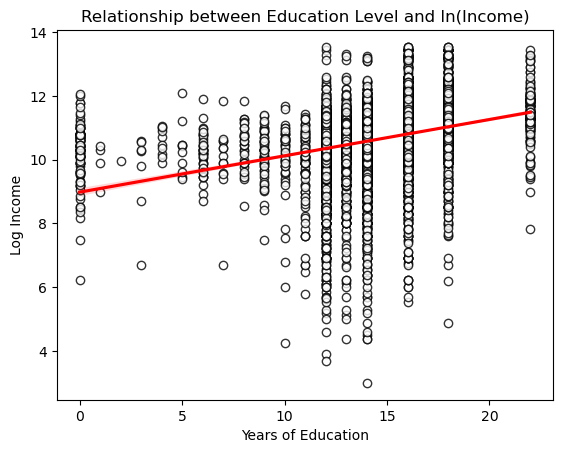

In [24]:
fig, ax = plt.subplots()

sns.regplot(
    df_acs, 
    x = "EDUCDC", 
    y = "INCWAGE_LOG", 
    scatter_kws={'color': 'white', 'edgecolors': 'black'},
    line_kws={'color': 'red'},
    ax=ax
    )

ax.set_xlabel("Years of Education")
ax.set_ylabel("Log Income")
ax.set_title("Relationship between Education Level and ln(Income)")

#### Q3

In [25]:
predictors = ["EDUCDC", "FEMALE", "AGE", "AGESQ", "WHITE", "BLACK", "HISPANIC", 
"MARRIED", "NCHILD", "VET"]

X = df_acs[predictors]
X = sm.add_constant(X)
y = df_acs["INCWAGE_LOG"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCWAGE_LOG   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     341.2
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:48:14   Log-Likelihood:                -11500.
No. Observations:                8376   AIC:                         2.302e+04
Df Residuals:                    8365   BIC:                         2.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7254      0.125     45.949      0.000       5.481       5.970
EDUCDC         0.0976      0.004     27.130      0.000       0.091       0.105
FEMALE        -0.4060      0.021    -19.066      0.000      -0.448      -0.364
AGE            0.1685      0.006     27.437      0.000       0.156       0.181
AGESQ         -0.0018   7.27e-05    -24.432      0.000      -0.002      -0.002
WHITE         -0.0307      0.029     -1.050      0.294      -0.088       0.027
BLACK         -0.2140      0.047     -4.599      0.000      -0.305      -0.123
HISPANIC      -0.0714      0.035     -2.023      0.043      -0.141      -0.002
MARRIED        0.2009      0.025      8.126      0.000       0.152       0.249
NCHILD        -0.0076      0.011     -0.694      0.488      -0.029       0.014
VET            0.0660      0.054      1.227      0.220      -0.039       0.171
==============================================================================
Omnibus:                     2754.229   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13819.313
Skew:                          -1.507   Prob(JB):                         0.00
Kurtosis:                       8.524   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(a.) We can see from the $R^2$ that the model explains 29% of the variation in ln(income).

(b.) The model predicts that an additional year of education will increase expected income by 9.76%, all else constant. We can see from the very low p-value that the expected effect of years of education on income is statistically significant at the 5% level. Thus, we can reject the null hypothesis in favor of the alternative hypothesis that the effect of an additional year of education on income is different from 0. 

This amount is also practically significant since a 9.76% boost to income is meaningful for nearly everyone. For example, we predict that an additional year of education would raise the income of someone making $50,000 to $54,880, all else constant.

(c.) The model predicts that an individual will receive the highest wage at age: 
$$\frac{-\hat{\beta}_{AGE}}{2\hat{\beta}_{AGESQ}} = \frac{-0.1685}{2(-0.0018)} = 46.8$$
In other words, we expect someone in the sample to earn their highest wage at about age 47.

(d.) All else equal, the model predicts that men will have higher wages because the estimated coefficient of the sex dummy variable "FEMALE" is negative. This could be because of discrimination, meaning women are paid less than men because employers choose to pay women less. Alternatively, this could be because of omitted variable bias, meaning there is a confounding variable that is correlated with being a woman that is a predictor of lower wages. Examples of possible confounding variables include industry, occupation, and number of hours worked. There is also an argument that we should not control for these factors since discrimination could push women toward less lucrative industries and occupations, and so the result we are getting is closer to the true wage penalty women receive due to discrimination.

(e.) The estimated coefficient of "WHITE" is -0.0307, meaning we predict that being white decreases wages by about 3%. Since the p-value is 0.294 > 0.05, we fail to reject the null hypothesis that being white has no effect on expected income at a 5% significance level. As the hint in the problem set implies, this could be because many Hispanic Americans classify themselves as white since "Hispanic" is an ethnicity, not a race, according to the US Census. If we only looked at non-Hispanic white Americans, we might see a positive expected effect on wages due to discrimination in favor of white Americans.

The estimated coefficient of "BLACK" is -0.2140, meaning we predict that being black decreases wages by about 21%. Since the p-value is nearly 0 < 0.05, we can reject the null hypothesis in favor of the alternative hypothesis that the expected effect of being black on wages is different from 0. This could be because of discrimination against black workers or omitted variables such as parents' income, wealth, and access to social networks. Likely it's some combination of both.

#### Q4

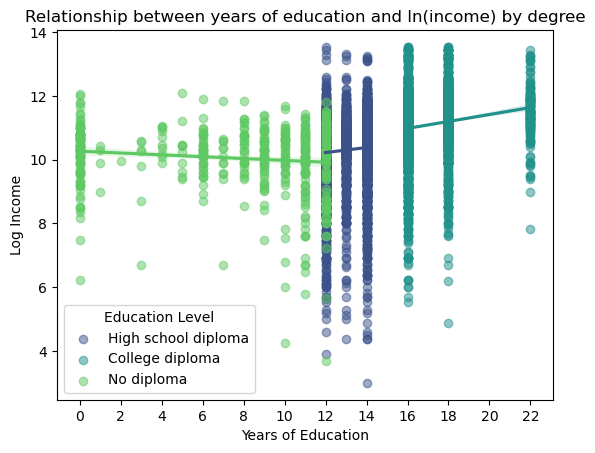

In [26]:
fig, ax = plt.subplots()

colors = sns.color_palette("viridis", 3)

sns.regplot(
    data=df_acs[df_acs['HSDIP'] == 1], 
    x="EDUCDC", 
    y="INCWAGE_LOG", 
    scatter_kws={'alpha': 0.5, 'color': colors[0]},
    line_kws={'color': colors[0]},
    ax=ax, 
    label='High school diploma'
    )

sns.regplot(
    data=df_acs[df_acs['COLDIP'] == 1], 
    x="EDUCDC", 
    y="INCWAGE_LOG", 
    scatter_kws={'alpha': 0.5, 'color': colors[1]}, 
    line_kws={'color': colors[1]},
    ax=ax, 
    label='College diploma'
    )

sns.regplot(
    data=df_acs[(df_acs['HSDIP'] == 0) & (df_acs['COLDIP'] == 0)], 
    x="EDUCDC", 
    y="INCWAGE_LOG", 
    scatter_kws={'alpha': 0.5, 'color': colors[2]}, 
    line_kws={'color': colors[2]},
    ax=ax, 
    label='No diploma'
    )

ax.set_xlabel("Years of Education")
ax.set_ylabel("Log Income")

# https://stackoverflow.com/a/12608937
ax.set_xticks(
    range(int(min(df_acs['EDUCDC'])), int(max(df_acs['EDUCDC'])) + 1, 2)
    )

ax.set_title("Relationship between years of education and ln(income) by degree")

ax.legend(title="Education Level", loc='best')

plt.show()

#### Q5

A model that will allow the predicted ln(income) to vary by degree is:
$$\begin{align*}
\ln(\text{INCWAGE}) &= \beta_0 + \beta_1\text{EDUCDC} + \beta_2\text{FEMALE} + \beta_3\text{AGE} \\
&\quad + \beta_4\text{AGESQ} + \beta_5\text{WHITE} + \beta_6\text{BLACK} + \beta_7\text{HISPANIC} \\
&\quad + \beta_8\text{MARRIED} + \beta_9\text{NCHILD} + \beta_{10}\text{VET} + \beta_{11}\text{HSDIP} \\
&\quad + \beta_{12}\text{COLDIP} + \beta_{13}\text{HSDIP-EDUCDC} + \beta_{14}\text{COLDIP-EDUCDC} \\
&\quad + \epsilon
\end{align*}$$

This model allows for both differential intercepts and differential slopes by diploma achieved by including both the dummy variables and their interaction effects. The coefficients of HSDIP and COLDIP allow the intercepts for people with a high school diploma or college diploma to vary, where $\beta_0$ is the intercept for people with no diploma, $\beta_0 + \beta_{11}$ is the intercept for people with a high school diploma, and $\beta_0 + \beta_{12}$ is the intercept for people with a college diploma. This way, each level of degree can shift predicted income up, reflecting the effect of receiving a diploma.

The differential slopes are achieved thanks to the interaction effects. The slope of EDUCDC for people with no high school diploma is $\beta_1$, the slope for people with a high school diploma is $\beta_1 + \beta_{13}$, and the slope for people with a college diploma is $\beta_1 + \beta_{14}$. This way, each level of degree can have a steeper slope reflecting the increasing returns to higher levels of education.

You could argue that this is the best possible model of how the world works if the true relationships between years of education and log income are linear. This way, we know we know our model is closely fitting the data, so we are accuraly predicing log income. If the true relationship is linear, then adding additional polynomial terms could cause overfitting, which would result in poor predictions on a different sample.

#### Q6


In [27]:
predictors = ["EDUCDC", "FEMALE", "AGE", "AGESQ", "WHITE", "BLACK", "HISPANIC", 
"MARRIED", "NCHILD", "VET", "HSDIP", "COLDIP", "HSDIP-EDUCDC", "COLDIP-EDUCDC"]

X = df_acs[predictors]
X = sm.add_constant(X)
y = df_acs["INCWAGE_LOG"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCWAGE_LOG   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     271.0
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:48:15   Log-Likelihood:                -11365.
No. Observations:                8376   AIC:                         2.276e+04
Df Residuals:                    8361   BIC:                         2.287e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8402      0.144     47.435      0.000       6.558       7.123
EDUCDC           -0.0095      0.009     -1.044      0.297      -0.027       0.008
FEMALE           -0.4175      0.021    -19.854      0.000      -0.459      -0.376
AGE               0.1565      0.006     25.684      0.000       0.145       0.168
AGESQ            -0.0016    7.2e-05    -22.771      0.000      -0.002      -0.001
WHITE            -0.0039      0.029     -0.134      0.893      -0.060       0.053
BLACK            -0.1592      0.046     -3.466      0.001      -0.249      -0.069
HISPANIC         -0.0515      0.035     -1.479      0.139      -0.120       0.017
MARRIED           0.1810      0.024      7.421      0.000       0.133       0.229
NCHILD           -0.0040      0.011     -0.373      0.709      -0.025       0.017
VET               0.0859      0.053      1.620      0.105      -0.018       0.190
HSDIP            -0.7817      0.214     -3.647      0.000      -1.202      -0.362
COLDIP           -0.3085      0.207     -1.494      0.135      -0.713       0.096
HSDIP-EDUCDC      0.0904      0.018      5.083      0.000       0.056       0.125
COLDIP-EDUCDC     0.0809      0.014      5.598      0.000       0.053       0.109
==============================================================================
Omnibus:                     2904.504   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14880.398
Skew:                          -1.592   Prob(JB):                         0.00
Kurtosis:                       8.701   Cond. No.                     4.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### (a.) 

In [28]:
hs_predict_dat = df_acs.query(
    "AGE == 22 and "
    "FEMALE == 1 and "
    "WHITE == 0 and "
    "BLACK == 0 and "
    "HISPANIC == 0 and "
    "MARRIED == 0 and "
    "NCHILD == 0 and "
    "VET == 0 and "
    "HSDIP == 1 and "
    "EDUCDC == 12"
)[predictors]

# https://stackoverflow.com/a/36533181
hs_predict_dat = sm.add_constant(hs_predict_dat, has_constant="add")

hs_prediction = model.get_prediction(hs_predict_dat)

hs_prediction.summary_frame(alpha=0.05)[:1]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
1133,9.26157,0.039964,9.183231,9.339909,7.415901,11.107239


The model predicts that a 22 year old woman who is neither black, white, nor Hispanic, is not married, has no children, and is not a veteran with a high school diploma will earn $e^{9.26157}$, or about $10,526 annually.

We could also calculate this manually:
$$6.8402 + 12(-0.0095 + 0.0904) - 0.4175 + (22)(0.1565) - (22^2)(0.0016) - 0.7817 = 9.2804$$
or about $e^{9.2804}$ equals $10,726 annually. 

The difference between the predictions may be due to rounding.

In [29]:
col_predict_dat = df_acs.query(
    "AGE == 22 and "
    "FEMALE == 1 and "
    "WHITE == 0 and "
    "BLACK == 0 and "
    "HISPANIC == 0 and "
    "MARRIED == 0 and "
    "NCHILD == 0 and "
    "VET == 0 and "
    "COLDIP == 1 and "
    "EDUCDC == 16"
)[predictors]

col_predict_dat = sm.add_constant(col_predict_dat, has_constant="add")

col_prediction = model.get_prediction(col_predict_dat)

col_prediction.summary_frame(alpha=0.05)[:1]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
4649,9.905595,0.039356,9.828447,9.982744,8.059976,11.751214


The model predicts that a 22 year old woman who is neither black, white, nor Hispanic, is not married, has no children, and is not a veteran with a college diploma will earn $e^{9.905595}$, or about $20,042 annually.

If we calculate the prediction manually:
$$6.8402 + 16(-0.0095 + 0.0809) - 0.4175 + (22)(0.1565) - (22^2)(0.0016) - 0.3085 = 9.9252$$
or about $e^{9.9252}$ equals $20,439 annually.

The difference between the predictions again may be due to rounding.

##### (b.)

We can tell the president that people with college degrees do have higher predicted wages than people without college degrees, all else constant. Using our model's predictions, from part (a), a 22 year old woman who is neither black, white, nor Hispanic, is not married, has no children, and is not a veteran with a college diploma will earn $20,042 - 10,526 = \$9,516$ more than a similar woman with only a high school diploma.

If we look back to the regression output, we can see that college graduates have a higher intercept than high school graduates but a slightly shallower slope, though this difference is likely not statistically significant since the confidence intervals have substantial overlap. The higher intercept for college graduates indicates that they have higher salaries on average than high school graduates, all else constant, though a large portion of their higher earnings comes from simply having 4 more years of education than high school graduates.

##### (c.)

I don't think we have enough evidence from this model to say whether increasing student loan subsidies would be a good idea or not, because we still have omitted variable bias. People in our sample who go to college are likely fundamentally different from people who do not go to college in terms of ambition, motivation, ability, and other hard to measure variables. Thus, we cannot say for sure that getting a college degree has a causal effect on wages. In other words, people who go to college might have made more money than people who do not even if they had not gone to college.

I would advise the president that a more thorough analysis using methods that allow for causal inference would be needed to determine whether increasing student loan subsidies is the correct policy decision.

##### (d.)

The model explains 31.2% of the variation in log wages according to the $R^2$ value. This is a bit higher than the 29.0% of variation explained in the first model without interaction terms, but we still are only explaining a fraction of the total variation in log wages. Ideally, we would want to add more variables such as years of experience, industry, and occupation to get a better fit.

##### (e.)

The multiple regression above is pretty simple, so I would not take the predictions too seriously. If we want to make better predictions, we should include more variables so we can explain more of the variation in log income, and we would want to test out different functional forms with additional polynomial terms and interaction terms. Making these additions could improve our adjusted $R^2$, meaning we are explaining more of the variation in log income. This way, our model can fit the data better and we can make more accurate predictions.

#### Q7

In [96]:
df_acs["NCHILD-MARRIED"] = np.multiply(df_acs["NCHILD"], df_acs["MARRIED"])
df_acs["COLDIP-VET"] = np.multiply(df_acs["COLDIP"], df_acs["VET"])
df_acs["FEMALE-HSDIP"] = np.multiply(df_acs["FEMALE"], df_acs["HSDIP"])
df_acs["AGE-FEMALE"] = np.multiply(df_acs["AGE"], df_acs["FEMALE"])
df_acs["NCHILD-FEMALE"] = np.multiply(df_acs["NCHILD"], df_acs["FEMALE"])
df_acs["HSDIP-BLACK"] = np.multiply(df_acs["HSDIP"], df_acs["BLACK"])
df_acs["HSDIP-HISPANIC"] = np.multiply(df_acs["HSDIP"], df_acs["HISPANIC"])
df_acs["AGE-NCHLT5"] = np.multiply(df_acs["AGE"], df_acs["NCHLT5"])

df_acs["EDUCDCSQ"] = np.power(df_acs["EDUCDC"], 2)
df_acs["EDUCDCCUB"] = np.power(df_acs["EDUCDC"], 3)

predictors = ["EDUCDC", "FEMALE", "AGE", "AGESQ", "WHITE", "BLACK", "HISPANIC", 
"MARRIED", "NCHILD", "VET", "HSDIP", "COLDIP", "HSDIP-EDUCDC", "COLDIP-EDUCDC",
"NCHLT5", "NCHILD-MARRIED", "COLDIP-VET", "FEMALE-HSDIP", "AGE-FEMALE", 
"EDUCDCSQ", "EDUCDCCUB", "NCHILD-FEMALE", "HSDIP-BLACK", "HSDIP-HISPANIC",
"AGE-NCHLT5"]

X = df_acs[predictors]
X = sm.add_constant(X)
y = df_acs["INCWAGE_LOG"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            INCWAGE_LOG   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:05:11   Log-Likelihood:                -11317.
No. Observations:                8376   AIC:                         2.269e+04
Df Residuals:                    8350   BIC:                         2.287e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.6915      0.154     43.356      0.000       6.389       6.994
EDUCDC            -0.0279      0.045     -0.627      0.531      -0.115       0.059
FEMALE            -0.1456      0.075     -1.949      0.051      -0.292       0.001
AGE                0.1605      0.006     25.543      0.000       0.148       0.173
AGESQ             -0.0017   7.29e-05    -22.808      0.000      -0.002      -0.002
WHITE             -0.0046      0.029     -0.160      0.873      -0.061       0.052
BLACK             -0.2676      0.067     -3.991      0.000      -0.399      -0.136
HISPANIC          -0.1344      0.050     -2.670      0.008      -0.233      -0.036
MARRIED            0.2159      0.029      7.486      0.000       0.159       0.272
NCHILD             0.1074      0.024      4.450      0.000       0.060       0.155
VET                0.1801      0.067      2.692      0.007       0.049       0.311
HSDIP             -1.3638      0.466     -2.929      0.003      -2.276      -0.451
COLDIP            -2.4877      0.952     -2.614      0.009      -4.353      -0.622
HSDIP-EDUCDC       0.1379      0.041      3.328      0.001       0.057       0.219
COLDIP-EDUCDC      0.2301      0.070      3.278      0.001       0.092       0.368
NCHLT5             0.3712      0.135      2.757      0.006       0.107       0.635
NCHILD-MARRIED    -0.0975      0.024     -4.122      0.000      -0.144      -0.051
COLDIP-VET        -0.2920      0.109     -2.689      0.007      -0.505      -0.079
FEMALE-HSDIP      -0.1064      0.042     -2.526      0.012      -0.189      -0.024
AGE-FEMALE        -0.0033      0.002     -2.115      0.034      -0.006      -0.000
EDUCDCSQ           0.0053      0.005      1.022      0.307      -0.005       0.015
EDUCDCCUB         -0.0003      0.000     -2.074      0.038      -0.001   -1.75e-05
NCHILD-FEMALE     -0.1148      0.019     -6.023      0.000      -0.152      -0.077
HSDIP-BLACK        0.1813      0.080      2.268      0.023       0.025       0.338
HSDIP-HISPANIC     0.1467      0.060      2.443      0.015       0.029       0.264
AGE-NCHLT5        -0.0084      0.004     -2.141      0.032      -0.016      -0.001
==============================================================================
Omnibus:                     2879.803   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14604.323
Skew:                          -1.580   Prob(JB):                         0.00
Kurtosis:                       8.644   Cond. No.                     4.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+05. This might indicate that there are
strong multicollineari

In [72]:
df_acs["EMPSTAT"].unique()

array([1], dtype=int64)